<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [ ]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [2]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [3]:
# Leitura do dataframe:
df_train = pd.read_csv('/train_2.csv')

In [4]:
df_train.shape

(11033, 63)

[**Python**] - Mostrar as primeiras 5 linhas:

In [86]:
df_train['target'].value_counts()

False    8513
True     2520
Name: target, dtype: int64

### Pré-processamento e transformação dos dados

[**Python**] - Construir coluna 'sexo' da seguinte forma:
* Se Gender= 'Male' ==> sexo= 1;
* Se Gender= 'Female' ==> sexo= 0.

In [ ]:
def define_label(row):
    if row['Gender'] == 'Male':
        return 1
    else:
        return 0

In [ ]:
df_sexo['sexo'] = df_sexo.apply(lambda row: define_label(row), axis = 1)
df_sexo.head()

[**Python**] - Renomear ou reescrever os nomes das colunas do dataframe em letras minúsculas:

In [ ]:
df_sexo = df_sexo.drop(columns= 'Gender', axis= 1)
df_sexo = df_sexo.rename({'Height': 'altura', 'Weight': 'peso'}, axis= 1)
df_sexo.head()

[**Python**] - Definir os arrays df_X e df_y:




In [33]:
df_X = df_train.copy()
df_X = df_X.drop(columns= ['target','id'])
df_y = df_train['target'].values

In [ ]:
df_y

array([ True, False, False, ...,  True, False,  True])

[**Python**] - Normalizar os dados - StandardScaler()

In [8]:
col_num = df_X.select_dtypes(include=['float64']).columns
col_num

Index(['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10',
       'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01', 'ind02', 'ind03',
       'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09', 'ind10', 'ind11',
       'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19',
       'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27',
       'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35',
       'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41', 'ind42', 'ind43'],
      dtype='object')

In [34]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#SS = StandardScaler()
MM = MinMaxScaler()
df_X.drop(columns='cnae2',inplace=True)
df_X[col_num]= MM.fit_transform(df_X[col_num])
df_X


,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,1,0.090339,0.011256,0.111095,0.003380,0.003380,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.004539,0.000138,0.011197,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0.005996,0.019476,0.124770,0.000000,0.039908,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.020139,0.006943,0.009106,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.000,0.0,0.0,0.0,0.0,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,0.000006,0.002902,0.110160,0.002378,0.002378,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000531,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000291,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,1.0000,0.2500,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.000191,0.004042,0.111078,0.001172,0.001172,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.012678,0.006355,0.001824,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,6,0.000000,0.001208,0.109509,0.000000,0.000763,0.0,0.001812,0.019529,0.000000,0.001546,0.0,0.130852,0.000382,0.000000,0.000355,0.001043,1.0,1.0000,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.1289,0.000,0.0,0.0,0.0,0.0,1.0,0.0000,1.0000,1.00,1.0000,1.0000,0.0000,1.0000,0.1667,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11029,7,0.000003,0.016780,0.122363,0.006307,0.006307,0.0,0.016780,0.034232,0.012331,0.012330,0.0,0.141299,0.000988,0.000000,0.001029,0.005716,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.8333,0.50,0.0000,0.0000,0.1250,0.9167,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11030,8,0.000004,0.001179,0.109494,0.000000,0.000000,0.0,0.001531,0.019253,0.000000,0.000000,0.0,0.130769,0.000295,0.000000,0.000407,0.000994,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11031,3,0.000021,0.001821,0.109838,0.002639,0.002639,0.0,0.013650,0.031157,0.018751,0.018750,0.0,0.130916,0.004997,0.010974,0.016500,0.006490,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.072,0.0,0.0,0.0,0.0,1.0,1.0000,0.2500,0.25,0.0000,0.0000,0.3333,0.0833,0.0833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_test = pd.read_csv('/test_2.csv')
X_teste = df_test.drop(columns = ['id','cnae2'], axis = 1)

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [35]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.1, random_state = 20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9929, 60); X: Teste=  (1104, 60)


In [36]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (9929,); Y: Teste = (1104,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [42]:
# Número de Neurônios na Input Layer:
N_I = 60

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 75

N_H2 = 75

# Função de Ativação da Hidden Layer:
FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [38]:
np.random.seed(22091980)
tf.random.set_seed(19800922)

[**Python**] - Definir a Rede Neural:

* 1 camada _dropout_ com $p= 0.1$:

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 75)                4575      
_________________________________________________________________
dropout_8 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 75)                5700      
_________________________________________________________________
dropout_9 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 76        
Total params: 10,351
Trainable params: 10,351
Non-trainable params: 0
_________________________________________________________________
None


### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [44]:
#Algoritmo_Opt = tf.keras.optimizers.Adam()beta_1=0.8, beta_2=0.999
Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.999, epsilon=1e-07
                                        , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
Metrics_Perf = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function, metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [45]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
311/311 [==============================] - 1s 2ms/step - loss: 0.1675 - binary_accuracy: 0.7680 - val_loss: 0.1590 - val_binary_accuracy: 0.7808
Epoch 2/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1650 - binary_accuracy: 0.7704 - val_loss: 0.1606 - val_binary_accuracy: 0.7808
Epoch 3/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1645 - binary_accuracy: 0.7703 - val_loss: 0.1655 - val_binary_accuracy: 0.7808
Epoch 4/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1645 - binary_accuracy: 0.7697 - val_loss: 0.1599 - val_binary_accuracy: 0.7808
Epoch 5/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1641 - binary_accuracy: 0.7712 - val_loss: 0.1556 - val_binary_accuracy: 0.7908
Epoch 6/100
311/311 [==============================] - 0s 1ms/step - loss: 0.1655 - binary_accuracy: 0.7710 - val_loss: 0.1593 - val_binary_accuracy: 0.7808
Epoch 7/100
311/311 [==============================] - 0s 

In [ ]:
def Model_Loss(hist):
    print(hist.history.keys())
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_Accuracy(hist):
    print(hist.history.keys())
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_MSE(hist):
    print(hist.history.keys())
    plt.plot(hist.history['mse'])
    plt.plot(hist.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [ ]:
Model_Accuracy(hist)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


KeyError: ignored

In [ ]:
Model_Loss(hist)

NameError: ignored

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [46]:
RN.evaluate(X_teste, y_teste)

35/35 [==============================] - 0s 868us/step - loss: 0.1581 - binary_accuracy: 0.7917


[0.15811824798583984, 0.7916666865348816]

In [ ]:
#hist2 = RN.fit(df_X, df_y, epochs = 200, callbacks = callbacks)

In [48]:
RN.evaluate(X_treinamento, y_treinamento)

311/311 [==============================] - 0s 795us/step - loss: 0.1610 - binary_accuracy: 0.7750


[0.16101355850696564, 0.7750025391578674]

In [49]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 792us/step - loss: 0.1607 - binary_accuracy: 0.7767


[0.16072385013103485, 0.776669979095459]

A seguir, a matriz de confusão:

In [ ]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


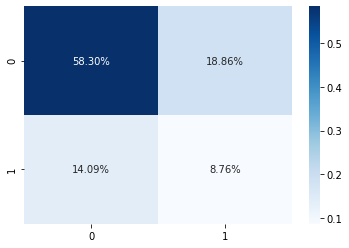

In [ ]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [ ]:
y_teste = RN.predict_classes(X_teste)


In [79]:
df_submit = pd.concat([df_test['id'],pd.DataFrame(y_teste,columns=['target']).astype('boolean')],axis=1)

In [81]:
df_submit.to_csv('/PyLadies_NL_4.csv',index = False, sep = ',')

In [80]:
df_submit['target'].value_counts()

False    977
True      23
Name: target, dtype: Int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.